## cmd-line argument
python -m llama_cpp.server --host 0.0.0.0 --model Meta-Llama-3.1-8B-Instruct.Q8_0.gguf --n_ctx 30000 --n_gpu_layers 30

In [14]:
from openai import OpenAI
from collections import defaultdict as dd
import pandas as pd
# Point to the server
client = OpenAI(base_url="http://localhost:8000/v1", api_key="cltl")


In [15]:
def query_LLM(model_client, prompt, temp=0.6):
    history = [
        {"role": "system", "content": prompt},
    ]
    completion = model_client.chat.completions.create(
        model="local-model", # this field is currently unused
        messages=history,
        temperature=temp,
        stream=False,
    )

    return completion.choices[0].message.content

In [16]:
path_to_corpus = '.\Corpora\corpus_with_MT_translations.pkl'
corpus_df = pd.read_pickle(path_to_corpus)
path_to_syntethic = '.\Corpora\sythetic_with_MT_translations.pkl'
synthetic_df = pd.read_pickle(path_to_syntethic)

In [4]:
corpus_df['Llama_Evaluation'] = ''

index = 0
for row in corpus_df.iterrows():
    dutch_sent = str(corpus_df["Dutch_Sentence"][index])
    reference_sentence = str(corpus_df['English_Sentence'][index])
    translated_sentence = str(corpus_df['Translated_Dutch'][index])
    prompt = f"""
[System message] You are a professional Dutch-English translator.
[Instruction message] You are a professional Dutch-English translator. Your task is to identify translation errors from a pair of the source Dutch sentence and the target English sentence. 
Please identify a maximum of 5 errors, assigning an error type for each with a severity scale from 1 (least sever) to 5 (most severe) using
the MQM annotation scheme. Please consider the following criteria for identifying errors:
Accuracy: when the target translation does not accurately represent the source 
Omission: when the target translation is missing content present in the source text, identify what was omitted.
Fluency: issues with punctuation, spelling, grammar, register and inconsistency.
Style: when the translation is grammatically correct but uses unnatural or awkward language.
Terminology: inappropriate or inconsistent use of terms
Locale convention: issues with formatting

Please provide the output in JSON format including the following keys for each error: 
['error type'(value:Accuracy, Omission, Fluency, Style, Terminology, Locale convention), 'error span index'(start and end index of the marked sentence in the target sentence) ,'marked text'(the identified error in the target sentence,'severity'(1-5))]
Do this for {dutch_sent} as source and {translated_sentence} as target.
Not all sentence necessarily contain errors.
[Requirement] output shall only consist of text in the prescribed JSON format
"""
    query_answer = query_LLM(client,prompt,temp=0.1)
    corpus_df.loc[index,'Llama_Evaluation'] = query_answer
    print(index)
    index+=1


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [18]:
corpus_df

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation,chrF_score
0,Solidariteitsfonds SOLFA wil gezondheid en zel...,Solidarity Fund SOLFA endeavours to improve he...,7,9,The SOLFA Solidarity Fund seeks to improve hea...,28.997844,"{\n ""errors"": [\n {\n ""error_type"": ""...",61.950810
1,"""Veel Afrikaanse vrouwen gaan naar huis met ee...","""Many African women return home with a fistula...",12,12,"""Many African women go home with a fistle, and...",30.620491,"{\n ""errors"": [\n {\n ""error_type"": ""...",64.943341
2,Professor Dirk De Ridder van de Afdeling Urolo...,"Professor Dirk De Ridder, from the urology dep...",24,23,Professor Dirk De Ridder van de UZ Leuven's De...,33.312911,"{\n ""errors"": [\n {\n ""error_type"": ""...",59.428348
3,Daar is hij vrouwen gaan opereren die door een...,"There he operated on women who, as a result of...",18,15,There he operated on women who had been struck...,27.602581,"{\n ""errors"": [\n {\n ""error_type"": ""...",41.873234
4,"""Bijna de hele overlevingseconomie in Afrika s...","""Just about the entire survival economy of Afr...",9,11,"""Around the entire survival economy in Africa ...",24.712443,"{\n ""errors"": [\n {\n ""error_type"": ""...",58.730561
...,...,...,...,...,...,...,...,...
995,"""Mijn onderzoek levert nog andere interessante...","""My research has also produced some other inte...",21,20,"""My research has yielded other interesting fig...",47.179914,"{\n ""errors"": [\n {\n ""error_type"": ""...",70.017198
996,"27,5 procent is van plan om dikwijls te snel t...","27.5 percent are planning to speed often, whil...",22,22,27.5 percent are planning to drive too fast so...,21.524707,"[\n {\n ""error type"": ""Accuracy"",\n ""er...",50.900566
997,Bijna een op drie jongeren antwoordt bovendien...,"Moreover, nearly one in three young people say...",28,27,Nearly one in three young people also replied:...,26.510694,"{\n ""errors"": [\n {\n ""error_type"": ""...",61.973707
998,In het kader van haar onderzoek ondervroeg Kat...,"In the context of her research, Kathleen Beull...",30,35,"As part of her research, Kathleen Beullens int...",40.667867,"[\n {\n ""error type"": ""Fluency"",\n ""err...",63.130742


In [19]:
synthetic_df['Llama_Evaluation'] = ''

index = 315
for row in synthetic_df.iterrows():
    dutch_sent = str(synthetic_df["Dutch_Sentence"][index])
    reference_sentence = str(synthetic_df['English_Sentence'][index])
    translated_sentence = str(synthetic_df['Translated_Dutch'][index])
    prompt = f"""
[System message] You are a professional Dutch-English translator.
[Instruction message] You are a professional Dutch-English translator. Your task is to identify translation errors from a pair of the source Dutch sentence and the target English sentence. 
Please identify a maximum of 5 errors, assigning an error type for each with a severity scale from 1 (least sever) to 5 (most severe) using
the MQM annotation scheme. Please consider the following criteria for identifying errors:
Accuracy: when the target translation does not accurately represent the source 
Omission: when the target translation is missing content present in the source text, identify what was omitted.
Fluency: issues with punctuation, spelling, grammar, register and inconsistency.
Style: when the translation is grammatically correct but uses unnatural or awkward language.
Terminology: inappropriate or inconsistent use of terms
Locale convention: issues with formatting

Please provide the output in JSON format including the following keys for each error: 
['error type'(value:Accuracy, Omission, Fluency, Style, Terminology, Locale convention), 'error span index'(start and end index of the marked sentence in the target sentence) ,'marked text'(the identified error in the target sentence,'severity'(1-5))]
Do this for {dutch_sent} as source and {translated_sentence} as target.
Not all sentence necessarily contain errors.
[Requirement] output shall only consist of text in the prescribed JSON format
"""
    query_answer = query_LLM(client,prompt,temp=0.1)
    print(index)
    synthetic_df.loc[index,'Llama_Evaluation'] = query_answer
    index+=1

315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392


In [20]:
corpus_df.to_pickle('.\Corpora\corpus_with_MT_translations_with_evaluation.pkl')
synthetic_df.to_pickle('.\Corpora\sythetic_with_MT_translations_with_evaluation.pkl')

In [2]:
import pandas as pd
path_to_corpus = '.\Corpora\corpus_with_MT_translations_with_evaluation.pkl'
corpus_df = pd.read_pickle(path_to_corpus)
path_to_synth = '.\Corpora\sythetic_with_MT_translations_with_evaluation.pkl'
synthetic_df = pd.read_pickle(path_to_synth)

C:\Users\Ino\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


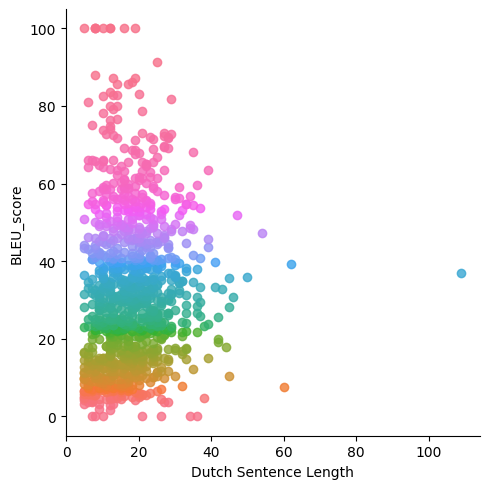

In [8]:
import matplotlib.pyplot as plt
import seaborn as sb
plot = sb.lmplot(corpus_df, x='Dutch Sentence Length' ,y="BLEU_score",hue='BLEU_score',legend = False, fit_reg=False)
plot.savefig('./BLEU_corpus.png')

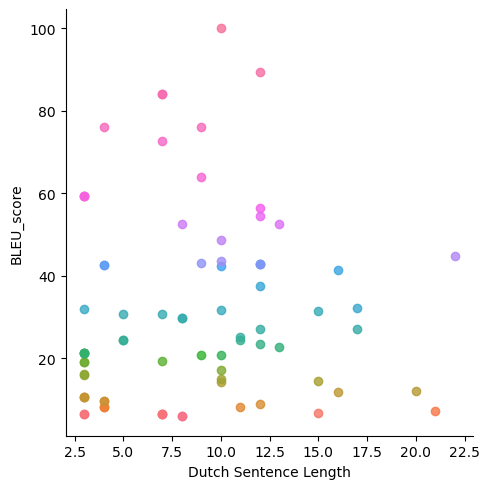

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
plot = sb.lmplot(synthetic_df, x='Dutch Sentence Length' ,y="BLEU_score",hue='BLEU_score',legend = False, fit_reg=False)
plot.savefig('./BLEU_synth.png')

In [10]:
corpus_df.nsmallest(n=30, columns = ['BLEU_score'])

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation
210,"Die kan wel tegen een stootje, dacht ik.""",,8,1,"""It could be against a stump, I thought"".",0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""..."
408,Dus moeten infrastructuur en architectuur daar...,,10,1,So infrastructure and architecture must also b...,0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""..."
953,Tot begin december verblijft Nigussie in Tervu...,,36,1,"Until the beginning of December, Nigussie stay...",0.000000,"[\n {\n ""error type"": ""Fluency"",\n ""err..."
954,"""In het Ethiopisch Hoogland waar ik vandaan ko...",,26,1,"""In the Ethiopian Hoogland where I come from, ...",0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""..."
970,In december keert Nigussie terug naar Ethiopië...,,21,1,"In December, Nigussie will return to Ethiopia,...",0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""..."
971,Mét de Prijs voor Ontwikkelingssamenwerking op...,,7,1,Mét ⁇ de Prix for Development Cooperation on ...,0.000000,"{\n ""errors"": [\n {\n ""error_type"": ""..."
972,"""Het geeft me voldoening dat ik mijn steentje ...",,34,1,"""It gives me satisfaction that I can contribut...",0.000000,"[\n {\n ""error type"": ""Accuracy"",\n ""er..."
137,Bei dir haben sie wohl das Kind fortgeworfen u...,Bei dir haben sie wohl das Kind fortgeworfen u...,12,25,Did they raise the Kind fortgeworfen and the N...,1.606214,"{\n ""errors"": [\n {\n ""error type"": ""..."
295,Ze wonnen er de hoofdprijs mee van de KVIV-Ing...,"Together, they won first place at the Engineer...",9,17,They won the main prize of the KVIV-Engineersp...,1.777318,"{\n ""errors"": [\n {\n ""error_type"": ""..."
112,"""Degenen die sport en ontwikkelingssamenwerkin...","""Those who wish to couple sport together with ...",12,14,"""In order to connect sports and development co...",2.954001,"{\n ""errors"": [\n {\n ""error_type"": ""..."


In [19]:
worst_synth_df = synthetic_df.nsmallest(n=20, columns = ['BLEU_score'])

In [33]:
worst_synth_df


,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation
322,"Een appel die niet valt, wordt nooit geplukt",An apple that doesnt fall will never be picked,8,9,An appeal that is not picked is never picked.,5.934203,"{\n ""errors"": [\n {\n ""error_type"": ""..."
329,"Een appel die niet valt, wordt nooit geplukt",An apple that doesnt fall will never be picked,8,9,An appeal that is not picked is never picked.,5.934203,"{\n ""errors"": [\n {\n ""error_type"": ""..."
317,Een lege maag is een slechte raadgever,An empty stomach is not a good advisor,7,8,A foolish man is a bad consultant.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
324,Een lege maag is een slechte raadgever,An empty stomach is not a good advisor,7,8,A foolish man is a bad consultant.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
331,Een lege maag is een slechte raadgever,An empty stomach is not a good advisor,7,8,A foolish man is a bad consultant.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
360,Een klein jongetje,A small boy,3,3,A little boy is a little boy.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
369,Een klein stroompje,A small stream,3,3,A little bit of a straw.,6.567275,"{\n ""errors"": [\n {\n ""error_type"": ""..."
383,Kun je het raam even dichtdoen? Het is koud bu...,Can you close the window for a moment? Its col...,15,17,It's cold outside and there's wind blowing aro...,6.638159,"{\n ""errors"": [\n {\n ""error_type"": ""..."
391,"Bel hem eens op, hij zal nou wel thuis zijn en...","Call him once, hell probably be home by now an...",21,20,"Give him a call, he'll be home soon and I can ...",7.133515,"{\n ""errors"": [\n {\n ""error_type"": ""..."
320,Geld maakt niet gelukkig,Money cant buy happiness,4,4,Money doesn't make you happy.,8.116698,"{\n ""errors"": [\n {\n ""error_type"": ""..."


In [34]:
best_synth_df = synthetic_df.nlargest(n=20, columns = ['BLEU_score'])

In [35]:
best_synth_df

,Dutch_Sentence,English_Sentence,Dutch Sentence Length,English Sentence Length,Translated_Dutch,BLEU_score,Llama_Evaluation
353,Zij heeft een kleinere broer die naar school g...,She has a younger brother who goes to school t...,10,10,She has a younger brother who goes to school t...,100.000000,"{\n ""errors"": [\n {\n ""error_type"": ""..."
386,"Dat is niet waar hoor, ik heb het van iemand a...","Thats not true, I heard it from someone else.",12,9,"That's not true, I heard it from someone else.",89.315398,"{\n ""errors"": [\n {\n ""error_type"": ""..."
316,Geld is het root van alle kwaad,Money is the root of all evil,7,7,Money is the root of all evil.,84.089642,"{\n ""errors"": [\n {\n ""error_type"": ""..."
346,Geld is de wortel van alle kwaad,Money is the root of all evil,7,7,Money is the root of all evil.,84.089642,"{\n ""errors"": [\n {\n ""error_type"": ""..."
340,Een rat in de keuken is een slecht teken,A rat in the kitchen is a bad omen,9,9,A rat in the kitchen is a bad sign.,75.983569,"{\n ""errors"": [\n {\n ""error_type"": ""..."
347,"Hoe meer, hoe beter","The more, the better",4,4,"The more, the better.",75.983569,"{\n ""errors"": [\n {\n ""error_type"": ""..."
350,"Liefde is blind, maar gelukkig niet doof","Love is blind, but fortunately not deaf",7,7,"Love is blind, but fortunately not dumb.",72.597953,"{\n ""errors"": [\n {\n ""error_type"": ""..."
335,Een ezel hoort bij het paard dat hem voert,A donkey belongs to the horse that leads it,9,9,A donkey belongs to the horse that feeds him.,63.894310,"{\n ""errors"": [\n {\n ""error_type"": ""..."
362,Een kleine hond,A small dog,3,3,A small dog.,59.460356,"{\n ""errors"": [\n {\n ""error_type"": ""..."
367,Een klein meer,A small lake,3,3,A small lake.,59.460356,"{\n ""errors"": [\n {\n ""error_type"": ""..."
